# Phase 4: Development Part 2

********************************************************************************************************************************************************

Project Title 9238 - AI based Spam Classifier

Name - Sakthivelu S

Team ID - 5282

Team Name - Proj_204227_Team_1

College Code - Name : 9238 - Mangayarkarasi College Of Engineering Paravai, Madurai

Group : 5

Github Repository Link : https://github.com/Sakthi0604/IBM-NAAN-MUDHALVAN-AI.git 

********************************************************************************************************************************************************

# Abstract:

Email Is The Most Widely Utilized Mode Of Official Communication. Despite The Availability Of Other Forms Of Communication, Email Usage Continues To Rise.More Than 55 Percent Of All Emails Have Been Recognised As Spam. This Demonstrates That Spammers Waste Email Users Time And Resources While Producing No Meaningful Result. Spammers Employ Sophisticated And Inventive Strategies To Carry Out Their Criminal Action Via Spam Emails. As A Result It Is Critical To Comprehend The Many Spam Email Classification Tactics And Mechanisms. The Main Focus Of Spam Classification Using Machine Learning Algorithm. 


# Proposal:
The reason to do spam classifier to detect unsolicited and unwanted emails, we can prevent spam messages from creeping into the user's inbox, thereby improving user experience by innovatives techniques and approaches.

In [40]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter


#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df= pd.read_csv("spam.xls",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [43]:
# Downloading the stopwords dataset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cse4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Preprocessing:
The  pre-processing  steps  that  are  widely  used in  some  spam detection  research  include:  noise  removal, stemming,  lemmatization.

A. Noise Removal:
Noise is any piece of text that is not relevant to the context of the data and the end result. In spam email, noise  include  stop  words,  alpha numeric word,  and  punctuation. 

B. Stemming:
Stemming is one  way  to normalize the  word form. Stemming  is a basic  rule-based  process for  removing suffixes  from  words  ("ing",  "ly",  "es",  "s",  etc).

C. Lemmatization:
Lemmatization is another way of normalizing the word form. In contrast to  stemming, lemmatization is an organized procedure  for obtaining  the root  form of the word, by  utilizing vocabulary (dictionary) as well as morphological analysis.

Text Cleaning:

Text Cleaning is a very important step in machine learning because your data may contains a lot of noise and unwanted character such as punctuation, white space, numbers, hyperlink and etc.

Some standard procedures that people generally use are:

1. convert all letters to lower/upper case
2. removing numbers
3. removing punctuation
4. removing white spaces
5. removing hyperlink
6. removing stop words such as a, about, above, down, doing and the list goes on…





In [44]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [45]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [46]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [47]:
df[df.duplicated()]


,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [48]:
#Drop duplicated values
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [50]:
df.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [51]:
df.shape

(5169, 2)

In [52]:
df['Category'].value_counts()


ham     4516
spam     653
Name: Category, dtype: int64

# Data Visualization:

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand. Data visualization can be utilized for a variety of purposes, and it’s important to note that is not only reserved for use by data teams.


# Histogram:

In statistics, a histogram is representation of the distribution of numerical data, where the data are binned and the count for each bin is represented. More generally, in Plotly a histogram is an aggregated bar chart, with several possible aggregation functions (e.g. sum, average, count...) which can be used to visualize data on categorical and date axes as well as linear axes.

First few rows of the dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Summary statistics for numeric columns:
       Category                                            Message
count      5169                                               5169
unique        2                                               5169
top         ham  Go until jurong point, crazy.. Available only ...
freq       4516                                                  1
Dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169

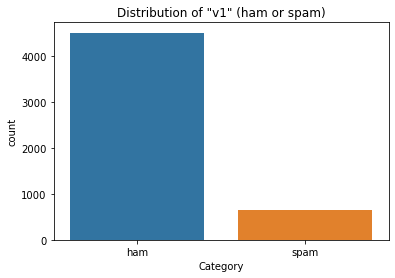

Summary statistics for message length:
count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: message_length, dtype: float64


C:\Users\cse4\AppData\Local\Temp\ipykernel_3612\3007939401.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_length'] = df['Message'].apply(len)


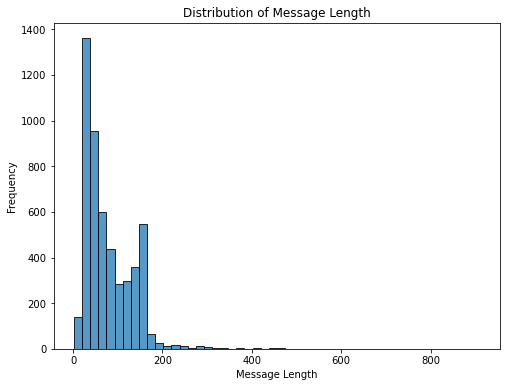

In [53]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get basic summary statistics for numeric columns (not applicable in this dataset)
print("Summary statistics for numeric columns:")
print(df.describe())

# Get basic information about the dataset
print("Dataset information:")
print(df.info())

# Check the distribution of the 'v1' column (ham or spam)
print("Distribution of 'v1' column:")
print(df['Category'].value_counts())

# Visualize the distribution of 'v1' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Category')
plt.title('Distribution of "v1" (ham or spam)')
plt.show()

# Analyze the length of messages in the 'v2' column
df['message_length'] = df['Message'].apply(len)

# Summary statistics for message length
print("Summary statistics for message length:")
print(df['message_length'].describe())

# Visualize the distribution of message length
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='message_length', bins=50)
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()



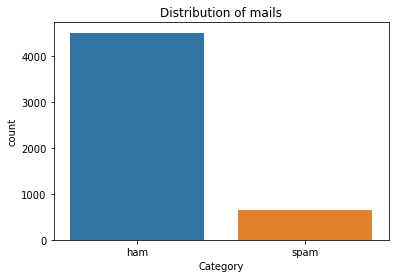

In [54]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [55]:
# Assuming you have a DataFrame named 'df'
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1
df.head()

,Category,Message,message_length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
# Separate the feature (X) and target (Y) data

X = df["Message"]
Y = df["Category"]

In [57]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [58]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


In [59]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [60]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [61]:
# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


# Logistic Regression:
Logistic Regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. From the definition it seems, the logistic function plays an important role in classification here but we need to understand what is logistic function and how does it help in estimating the probability of being in a class. The formula mentioned in the above image is known as Logistic function or Sigmoid function and the curve called Sigmoid curve. The Sigmoid function gives an S shaped curve. The output of Sigmoid function tends towards 1 as z → ∞ and tends towards 0 as z → −∞. Hence Sigmoid/logistic function produces the value of dependent variable which will always lie between [0,1] i.e the probability of being in a class. 



# Architecture Diagram:

An architectural diagram is a visual representation that
shows the physical implementation of the components of a
software system. It shows the general structure of the
software system and the associations, boundaries and limits
between each element.

# Architecture Diagram:
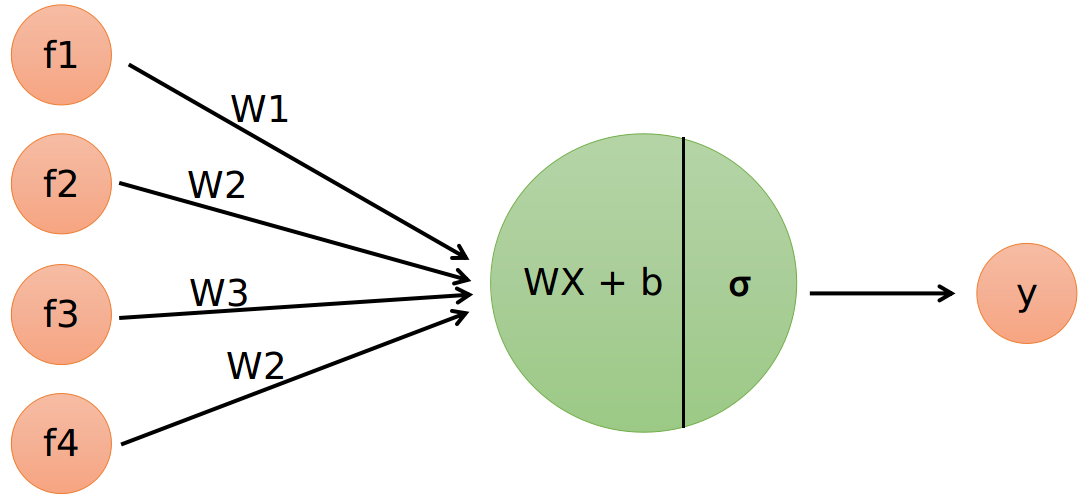
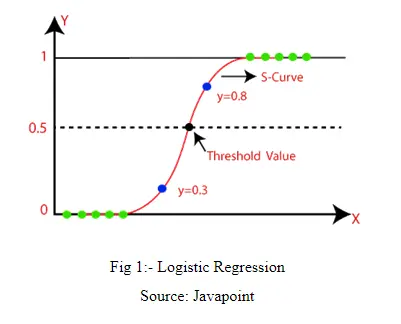


In [62]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [63]:
# Make predictions on the training data and calculate the accuracy

predtrain = model.predict(X_train_features)
accutrain = accuracy_score(Y_train, predtrain)

# Accuracy:

Accuracy is part of a Python program that aims to display the accuracy of a machine learning model on the training data.


In [64]:
print("Accuracy on training data:",accutrain*100)

Accuracy on training data: 96.13059250302297


# F1-Score:

This program computes the F1 score, a metric that balances precision and recall, for a logistic regression model trained on a dataset. It then prints the F1 score for the training data. This evaluation helps assess the model's performance in classification tasks.

In [70]:
from sklearn.metrics import f1_score

pred_train = model.predict(X_train_features)
f1_train = f1_score(Y_train, pred_train)
print(f'F1 Score (Training): {f1_train*100}')


F1 Score (Training): 97.84075573549259


# Recall:

This program calculates the recall score for a logistic regression model trained on a dataset. The recall score measures the ability of the model to identify all the relevant cases correctly. It then prints the recall score for the training data, providing insights into the model's performance in capturing true positives.

In [71]:
from sklearn.metrics import recall_score

pred_train = model.predict(X_train_features)
recall_train = recall_score(Y_train, pred_train)
print(f'Recall (Training): {recall_train*100}')


Recall (Training): 99.94485800937414


# Precision:

This program computes the precision score, a metric that assesses the accuracy of positive predictions, for a logistic regression model trained on a dataset. It then prints the precision score for the training data. This evaluation helps in understanding how well the model correctly identifies true positives among its positive predictions.

In [72]:
from sklearn.metrics import precision_score

pred_train = model.predict(X_train_features)
precision_train = precision_score(Y_train, pred_train)
print(f'Precision (Training): {precision_train*100}')


Precision (Training): 95.82342056568861


# Confusion Matrix:

This code calculates a confusion matrix for a logistic regression model's predictions on the training data. The confusion matrix is a table that summarizes the model's performance by classifying predictions into true positives, true negatives, false positives, and false negatives. The code then creates a heatmap to visually represent the confusion matrix, with annotations to show the counts. Finally, it adds a title to the heatmap.

array([[ 350,  158],
       [   2, 3625]], dtype=int64)

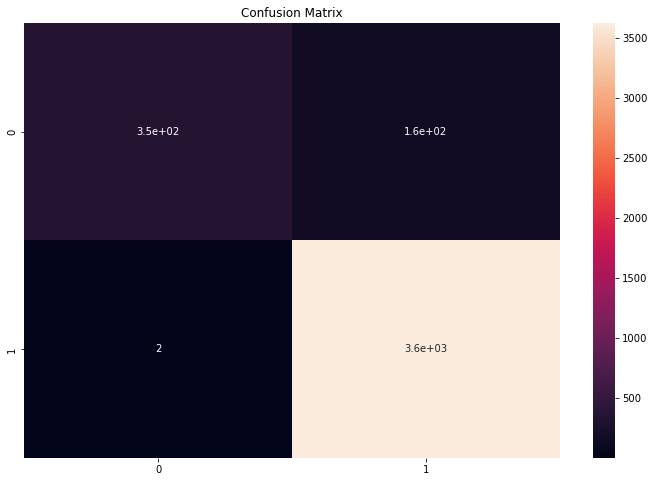

In [68]:

cm=confusion_matrix(Y_train,predtrain)
fig=plt.figure(figsize=(12,8))
sns.heatmap(
    cm,
    annot=True,
)
plt.title("Confusion Matrix")
cm

# Conclusion:
By accurately identifying and filtering spam, individuals and organizations can focus on important emails and mitigate potential risks associated with malicious content. In conclusion, email spam detection using machine learning offers a promising solution to the pervasive problem of unwanted and harmful emails.